###  **Overview**

*   kNN
    * different number of neighbors
    * L1-norm and L2-norm
    * weighted distance
    * visualization - the voronoi diagram
*   linear regression
    * a very simple linear regression
    * non-linear data
    * collinear data


In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

###  **Get the dataset**

*   using data from https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

In [37]:
data = load_breast_cancer()
x = data.data
y = data.target
print(data.feature_names)
print(sum(y))
print(x[0])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
357
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


###  **shuffle and seperate the data**

*   Actually generated random index instead of directly shuffle the data.
*   The train, val, test data number is 350, 100, 119.
*   It can be achieved using function in sklearn https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html.

In [45]:
# np.random.permutation(10)
# array([1, 7, 4, 3, 0, 9, 2, 5, 8, 6])
random_index = np.random.permutation(x.shape[0])

train_x = np.array([x[random_index[i]] for i in range(0, 350)])
train_y = np.array([y[random_index[i]] for i in range(0, 350)])

val_x = np.array([x[random_index[i]] for i in range(350, 450)])
val_y = np.array([y[random_index[i]] for i in range(350, 450)])

test_x = np.array([x[random_index[i]] for i in range(450, 569)])
test_y = np.array([y[random_index[i]] for i in range(450, 569)])

print(train_x.shape)
print(val_x.shape)
print(test_x.shape)

(350, 30)
(100, 30)
(119, 30)


###  **start training the model**

*   test the performance using different number of neighbors. 
*   apply different distance matrix

In [39]:
def get_acc(neighbor, distance_norm=2, weights='uniform'):
  clf = KNeighborsClassifier(n_neighbors = neighbor, p=distance_norm,weights=weights)
  clf = clf.fit(train_x,train_y)
  score_train_tmp = clf.score(train_x,train_y)
  score_val_tmp = clf.score(val_x,val_y)
  score_test_tmp = clf.score(test_x,test_y)
  return [score_train_tmp, score_val_tmp, score_test_tmp]

In [40]:
def plot_acc(krange, score):
  plt.plot(krange, score)
  plt.xticks(krange, krange)
  plt.xlabel("number of neighbors")
  plt.ylabel("performance")
  plt.show()
  print('-'*45)

Performance on the training set


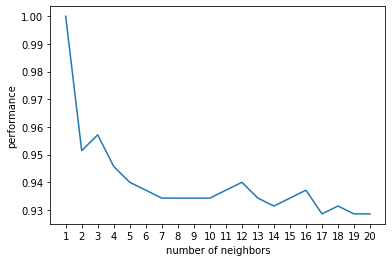

---------------------------------------------
Performance on the validation set


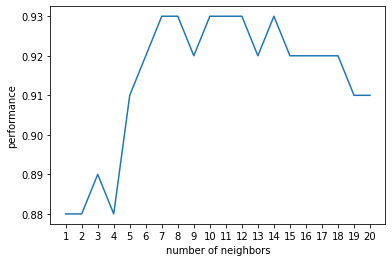

---------------------------------------------
Performance on the test set


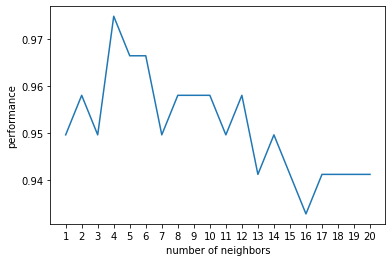

---------------------------------------------


In [41]:
# test the model using different number of neighbors, from 1 to 20
# the evaluation score is the average accuracy for two classes. 
krange = range(1,21)
score_total = []
for i in krange:
    score_tmp = get_acc(neighbor=i)
    score_total.append(score_tmp)
score_total = np.array(score_total)

print('Performance on the training set')
plot_acc(krange, score_total[:,0])
print('Performance on the validation set')
plot_acc(krange, score_total[:,1])
print('Performance on the test set')
plot_acc(krange, score_total[:,2])

Performance on the training set


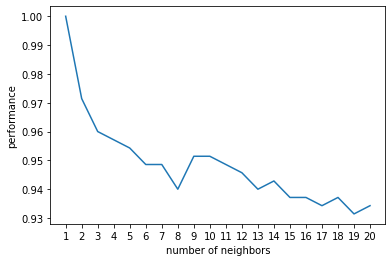

---------------------------------------------
Performance on the validation set


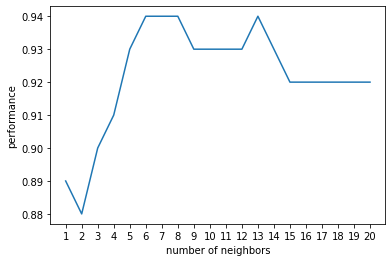

---------------------------------------------
Performance on the test set


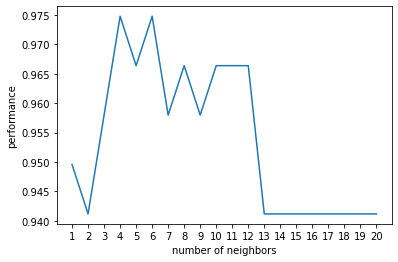

---------------------------------------------


In [42]:
# test the model using L1 norm (manhattan_distance) instead of L2 norm (euclidean distance)
# editing the 'p' parameter in the function
score_total = []
for i in krange:
    score_tmp = get_acc(neighbor=i, distance_norm=1)
    score_total.append(score_tmp)
score_total = np.array(score_total)

print('Performance on the training set')
plot_acc(krange, score_total[:,0])
print('Performance on the validation set')
plot_acc(krange, score_total[:,1])
print('Performance on the test set')
plot_acc(krange, score_total[:,2])

Performance on the training set


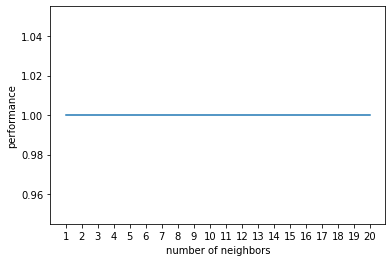

---------------------------------------------
Performance on the validation set


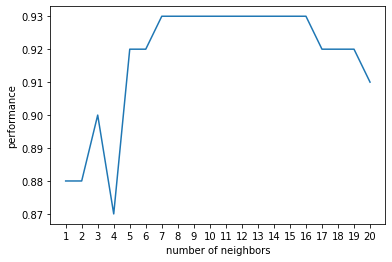

---------------------------------------------
Performance on the test set


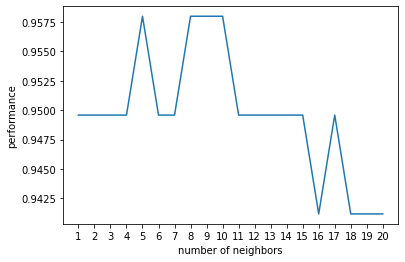

---------------------------------------------


In [43]:
# test the model using back L2 norm, but introducing weight in distance
# editing the 'weights' parameter in the function
score_total = []
for i in krange:
    score_tmp = get_acc(neighbor=i, distance_norm=2, weights='distance')
    score_total.append(score_tmp)
score_total = np.array(score_total)

print('Performance on the training set')
plot_acc(krange, score_total[:,0])
print('Performance on the validation set')
plot_acc(krange, score_total[:,1])
print('Performance on the test set')
plot_acc(krange, score_total[:,2])

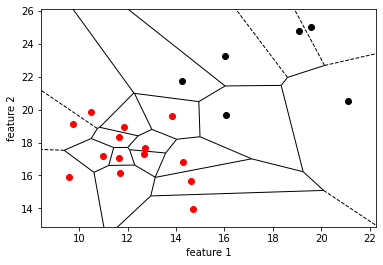

In [46]:
# use only two of those features in order to plot a 2-d figure into a Voronoi diagram
# use 20 points just for a demo
train_x_2d = [[tmp[0], tmp[1]] for tmp in train_x[:20]]
train_y_2d = [tmp for tmp in train_y[:20]]

train_x_2d_0_0 = [train_x_2d[i][0] for i in range(0, len(train_x_2d)) if train_y_2d[i] == 0]
train_x_2d_0_1 = [train_x_2d[i][1] for i in range(0, len(train_x_2d)) if train_y_2d[i] == 0]

train_x_2d_1_0 = [train_x_2d[i][0] for i in range(0, len(train_x_2d)) if train_y_2d[i] == 1]
train_x_2d_1_1 = [train_x_2d[i][1] for i in range(0, len(train_x_2d)) if train_y_2d[i] == 1]

vor = Voronoi(train_x_2d)
voronoi_plot_2d(vor, show_vertices = False)

plt.plot(train_x_2d_0_0, train_x_2d_0_1, 'ko')
plt.plot(train_x_2d_1_0, train_x_2d_1_1, 'ro')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.show()

# **Linear Regression**

**Given:** 

*    Training Data {($x_1$, $y_1$), ...., ($x_N$, $y_N$)}, $x \in R^D, y \in R$

**Learn a Model:** 

*    $f:x \rightarrow y$ with $f(x) = w_0 + \Sigma_{d=1}^{d=D} w_d x_d$

**Objective:** 

*    *Minimize:* $J(w_0, w_1,...,w_d) = \frac{1}{N} \Sigma_{n=1}^{n=N}[y_n-(w_0 + \Sigma_{d=1}^{d=D} w_d x_d)]^2$

# Training an Example Model using Gradient Descent  

**Assume there are N datapoints $(x_i, y_i)$**
*   $x \in R$ be the independent variable and $y \in R$ be the dependent variable

**Learn a model**
*   **Equation 1:** $f(x) = w_0 + w_1x$

**By minimizng**
*   **Equation 2:** $J(w_0,w_1)$ = $\frac{1}{N} \Sigma_{n=1}^{n=N}[y_n-f(x_n)]^2$

**Gradient Descent Update**
*   $w \leftarrow w - \eta \ \triangledown J(w)$

*   $w_0 \leftarrow w_0 - \eta \frac{\partial J(w)}{\partial w_0}$

*   $w_1 \leftarrow w_1 - \eta \frac{\partial J(w)}{\partial w_1}$

**Calculating Gradients**
*   **Equation 3:** $\frac{\partial J(w)}{\partial w_0}$ = $ \frac{1}{N} \Sigma_{n=1}^{n=N} [2 \ (y_n-(w_0 + w_1 x_n))]$ = $ \frac{-2}{N} \Sigma_{n=1}^{n=N} [(y_n-f(x_n))]$

*   **Equation 4:** $\frac{\partial J(w)}{\partial w_1}$ = $ \frac{1}{N} \Sigma_{n=1}^{n=N} [2 \ (y_n-(w_0 + w_1 x_n)) \ (-x_n)]$ = $ \frac{-2}{N} \Sigma_{n=1}^{n=N} [(y_n-f(x_n)) \ (x_n)]$

**Update:** $w_0, w_1$
*   **Equation 5:** $w_0 = w_0 - \eta (\frac{-2}{N} \Sigma_{n=1}^{n=N} [(y_n-f(x_n))])$

*   **Equation 6:** $w_1 = w_1 - \eta (\frac{-2}{N} \Sigma_{n=1}^{n=N} [(y_n-f(x_n)) \ (x_n)])$

In [12]:
"""
Training Linear Regression Model using Gradient Descent
y = w_1 x + w_0
"""

class LinearRegression(object):

  def __init__(self):
    self.w_0, self.w_1 = 0., 0.  # Initialize model parameters to zeros

  def calculate_gradients(self, X, y, predict):
    number_samples = len(X)
    der_w0 = (-2.0/number_samples) * sum(y-predict)               # Equation 3
    der_w1 = (-2.0/number_samples) * sum(X*(y-predict))           # Equation 4
    return der_w0, der_w1

  def calculate_loss(self, predict, y):
    return np.square(np.subtract(predict, y)).mean()              # Equation 2

  def train(self, X, y, learning_rate=0.0001, epochs=500):
    losses = []  # Store loss values at each epoch
    for _ in range(epochs):
      predict = self.w_1*X + self.w_0                             # Equation 1
      losses.append(self.calculate_loss(predict, y))
      der_w0, der_w1 = self.calculate_gradients(X, y, predict)
      self.w_0 -= learning_rate * der_w0                          # Equation 5
      self.w_1 -= learning_rate * der_w1                          # Equation 6
    return losses

  def predict(self, X):
    return self.w_1*X + self.w_0                                  # Equation 1

  def __str__(self):
    # Prints w_1, w_0
    return "w_1: {0} and w_0: {1}".format(self.w_1, self.w_0)


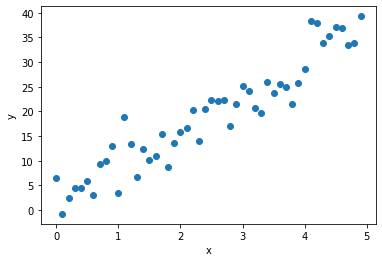

In [13]:
"""
Create Data:
Example: y = 7x + 2
"""

X = np.arange(0.,5,0.1)  # Generate X samples [0.0, 0.1, 0.2,......, 4.9]
noise = np.random.normal(0., 4., size=(50,)) # Create Random Gaussian Noise
y = (7*X + 2) + noise  # Calculate y = 7x + 2 + Noise
plt.scatter(X, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()


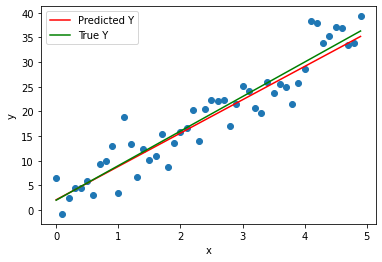

In [15]:
LR = LinearRegression()  # Create Linear Regression Model Object
losses = LR.train(X, y, learning_rate=0.0001, epochs=2000)  # Train Linear Regression Model
predict = LR.predict(X)  # Predict y values based on the learned classifier
plt.scatter(X,y)
plt.plot([min(X), max(X)], [min(predict), max(predict)], color='r', label="Predicted Y")
plt.plot([min(X), max(X)], [min(7*X+2), max(7*X+2)], color='g', label="True Y")
plt.xlabel("x")
plt.ylabel("y")
_ = plt.legend()
plt.show()

Text(0, 0.5, 'loss')

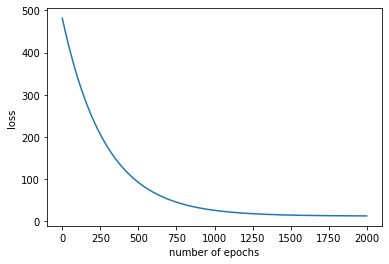

In [16]:
plt.plot(losses)  # Plot losses
plt.xlabel("number of epochs")
plt.ylabel("loss")

In [18]:
#  Print parameters
print ("Model trained using Gradient Descent")
print(LR)
print ("------------------------------------------")

# Use Equations in the handout "Linear Regression in the 1D space" for w1* and w0*
mean_x = sum(X)/len(X)
mean_y = sum(y)/len(y)
w1 = sum(((X-mean_x)*(y-mean_y)))/ sum(((X-mean_x)*(X-mean_x)))
w0 = mean_y-w1*mean_x
print ("Model based on the Equations")
print("w_1: {0} and w_1: {1}".format(w1, w0))

Model trained using Gradient Descent
w_1: 6.759077895506201 and w_0: 2.0776580959225104
------------------------------------------
Model based on the Equations
w_1: 7.0522051320331824 and w_1: 1.845459227269174


###  **non-linear data**

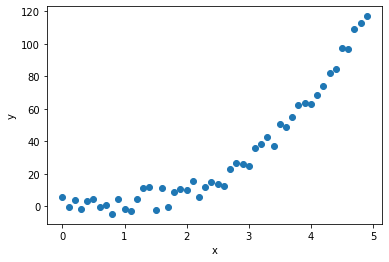

In [19]:
X = np.arange(0.,5,0.1)  # Generate X samples [0.0, 0.1, 0.2,......, 4.9]
noise = np.random.normal(0., 4., size=(50,)) # Create Random Gaussian Noise
y = (X**3 + 2) + noise  # Calculate y = x^3 + 2 + Noise
plt.scatter(X, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [20]:
# first try a simple linear model, the acc is not good
from sklearn.linear_model import LinearRegression
X = X.reshape((len(X),1))
reg = LinearRegression().fit(X, y)
reg.fit(X, y)
print('model acc on training data', reg.score(X, y))

model acc on training data 0.8301686110208826


In [21]:
# Then for the non-linear data, we use the polynomial features
print(X[2])
poly = PolynomialFeatures(3)
transfered_X = poly.fit_transform(X)
reg = LinearRegression().fit(transfered_X, y)
print(transfered_X[2])
# x^0 x x^2 x^3
reg.fit(transfered_X, y)
print('model acc on training data', reg.score(transfered_X, y))

[0.2]
[1.    0.2   0.04  0.008]
model acc on training data 0.9876792100642663


###  **collinearity data**

*   near-linear relationships among the independent variables
*   may results in weight is different from the fact, or wrong indication of the significant level
*   One example: economy-related data (the sum of the money is constant, spend more money here, then less money there)
*   What we can do:
  1.   Remove the collinear features from the feature space, preserving only one
  2.   Ridge regression: minimize ||y - Xw||^2_2 + alpha * ||w||^2_2
  3.   PCA (Principal component analysis), later in class









In [22]:
X = [[1, 2, 3], 
     [2, 4, 2],
     [3, 6, 4],
     [4, 7, 3],
     [5, 7, 2],
     [6, 7, 1],
     [7, 8, 1],
     [8, 10, 2],
     [9, 12, 4],
     [10, 13, 3]]
y = [3, 9, 11, 15, 13, 13, 17, 21, 25, 27]

In [23]:
# apply the traditional linear regression model for such data
# disadvantage: great variance among weights -> one variable change slightly, result a large change in y
reg = LinearRegression().fit(X, y)
print('model acc on training data', reg.score(X, y))
print('weight',reg.coef_)
print('weight variance',np.var(reg.coef_))
print('predict [1, 2, 3] using this model',reg.predict([[1, 2, 3]])[0])
print('predict [2, 2, 4] using this model',reg.predict([[2, 2, 4]])[0])
print('predict [1, 4, 3] using this model',reg.predict([[1, 4, 3]])[0])

model acc on training data 0.9873597968867383
weight [-0.58921075  2.69647355 -0.41582704]
weight variance 2.2791331302052353
predict [1, 2, 3] using this model 2.7432829554995912
predict [2, 2, 4] using this model 1.7382451721242806
predict [1, 4, 3] using this model 8.13623005877414


In [31]:
# apply the ridge regression
# the weight variance is adjustable using alpha, but not the smaller the better
reg = Ridge(alpha=1.0)
reg.fit(X, y)
print('model acc on training data', reg.score(X, y))
print('weight',reg.coef_)
print('weight variance',np.var(reg.coef_))
print('predict [1, 2, 3] using this model',reg.predict([[1, 2, 3]])[0])
print('predict [2, 2, 4] using this model',reg.predict([[2, 2, 4]])[0])
print('predict [1, 4, 3] using this model',reg.predict([[1, 4, 3]])[0])

model acc on training data 0.9847885711869117
weight [0.22860539 1.9437401  0.05427892]
weight variance 0.7269044780600913
predict [1, 2, 3] using this model 3.513470681458015
predict [2, 2, 4] using this model 3.796354992076095
predict [1, 4, 3] using this model 7.400950871632324
